In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from imtools import *

In [11]:
def show_img(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='Greys', vmin=0, vmax=255)
    plt.axis('off')

In [12]:
plt.style.use('dark_background')

In [13]:
img = np.array(Image.open('test_images/bearing_scrached_fuji_tunnel.jpg').convert('L'))

In [14]:
# Sobel deriviative filters
img_x = np.zeros(img.shape)
filters.sobel(img, 1, img_x)

img_y = np.zeros(img.shape)
filters.sobel(img, 0, img_y)

magnitude = np.sqrt(img_x**2+img_y**2)

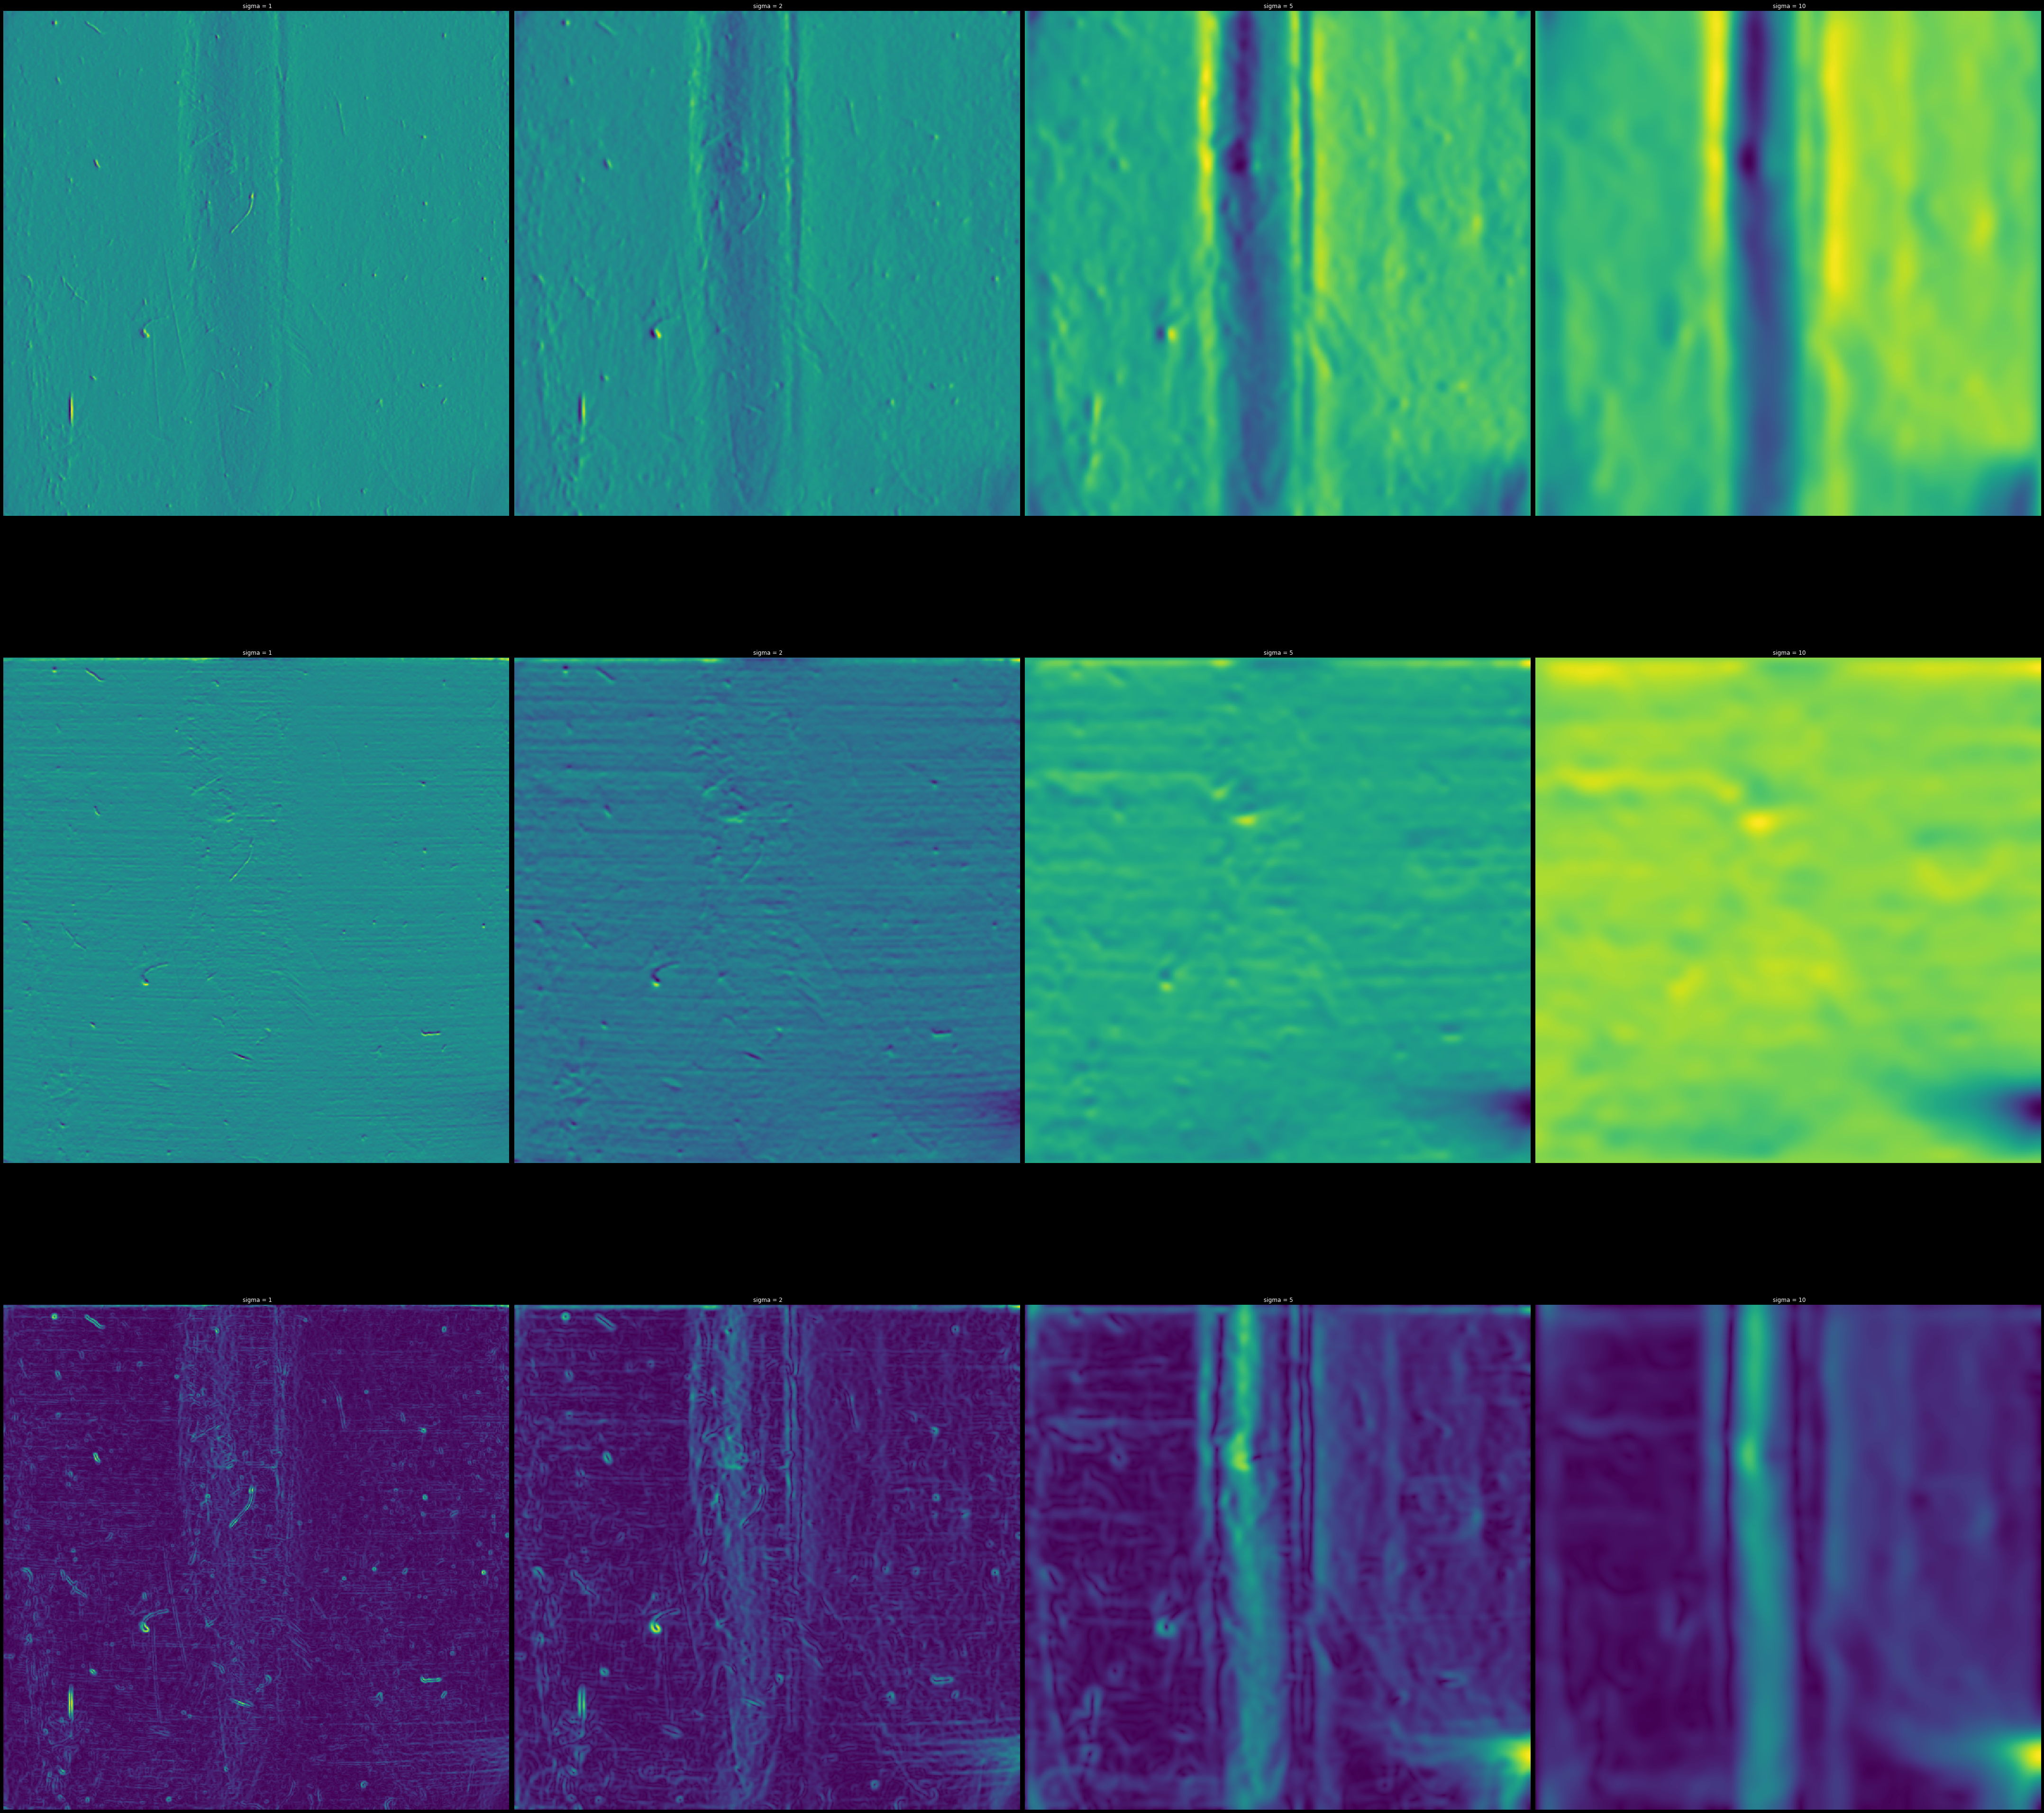

In [15]:
sigmas = [1,2,5,10]
derivatives = {'img_x': (0,1),'img_y':(1,0),'gradient': 'magnitude'}

fig, frame = plt.subplots(len(derivatives), len(sigmas), figsize=(60,60))
for i, sigma in enumerate(sigmas):
    img_blurred = filters.gaussian_filter(img, sigma)
        
    for j, derivative in enumerate(derivatives):        
        if derivatives[derivative] == 'magnitude':
            filters.gaussian_filter(img_blurred, (sigma, sigma), derivatives['img_x'], img_x)
            filters.gaussian_filter(img_blurred, (sigma, sigma), derivatives['img_y'], img_y)
            magnitude = np.sqrt(img_x**2+img_y**2)
            img_derivative = magnitude
        else:
            filters.gaussian_filter(img_blurred, (sigma, sigma), \
                                                     derivatives[derivative], img_x)
            img_derivative = img_x
        
        frame[j,i].imshow(img_derivative)
        frame[j,i].axis('off')
        frame[j,i].set_title(' sigma = ' + str(sigma))
plt.tight_layout()

fig.savefig("result_images/image_derivatives.jpg")